# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['AGES'] = app_train['DAYS_BIRTH']/365

customized_age_bin = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
customized_age_grp = pd.cut(app_train['AGES'], customized_age_bin)
app_train["customized_age_grp"] = customized_age_grp

# 計算各組出現幾次
app_train["customized_age_grp"].value_counts(sort=False)

(20, 25]    12159
(25, 30]    32862
(30, 35]    39440
(35, 40]    42868
(40, 45]    41406
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(60, 65]    27476
(65, 70]     8103
Name: customized_age_grp, dtype: int64

In [6]:
grp = ['customized_age_grp']+ ['CODE_GENDER']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

customized_age_grp  CODE_GENDER
(20, 25]            F              131364.407127
                    M              162196.874878
(25, 30]            F              148604.481881
                    M              186640.973501
                    XNA            191250.000000
(30, 35]            F              161942.383554
                    M              201601.621728
(35, 40]            F              164229.522534
                    M              205126.011533
                    XNA            157500.000000
(40, 45]            F              166564.293229
                    M              207878.634222
(45, 50]            F              166269.329219
                    M              204943.775524
(50, 55]            F              161054.692076
                    M              195104.369839
(55, 60]            F              150973.509212
                    M              181648.072493
                    XNA            207000.000000
(60, 65]            F              14

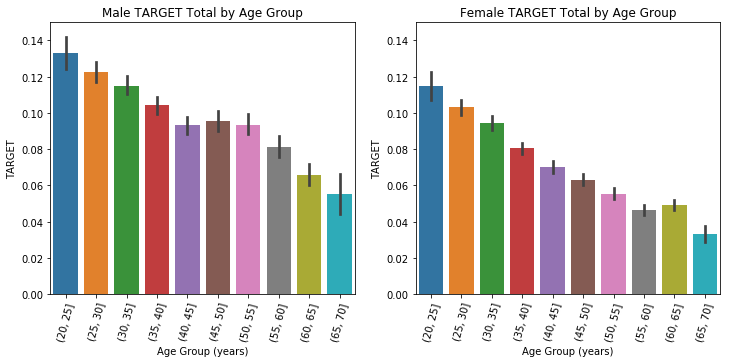

In [7]:
plt.figure(1, figsize = (12,5))

#男性年紀區間收入
ax1 = plt.subplot(1,2,1)
plt.sca(ax1)
# 以年齡區間為 x, target 為 y 繪製 barplot
px = app_train.loc[app_train['CODE_GENDER'] == 'M']['customized_age_grp']
py = app_train.loc[app_train['CODE_GENDER'] == 'M']['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('TARGET')
plt.ylim(0,0.15)
plt.title('Male TARGET Total by Age Group');

#女性年紀區間收入
ax2 = plt.subplot(1,2,2)
plt.sca(ax2)
# 以年齡區間為 x, target 為 y 繪製 barplot
px2 = app_train.loc[app_train['CODE_GENDER'] == 'F']['customized_age_grp']
py2 = app_train.loc[app_train['CODE_GENDER'] == 'F']['TARGET']
sns.barplot(px2, py2)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)');
plt.ylim(0,0.15)
plt.title('Female TARGET Total by Age Group');

# 比較男女各年齡區間收入
plt.show()

In [8]:
# 檢視各年齡層男女收入差異
grp = ['customized_age_grp']+ ['CODE_GENDER']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

customized_age_grp  CODE_GENDER
(20, 25]            F              131364.407127
                    M              162196.874878
(25, 30]            F              148604.481881
                    M              186640.973501
                    XNA            191250.000000
(30, 35]            F              161942.383554
                    M              201601.621728
(35, 40]            F              164229.522534
                    M              205126.011533
                    XNA            157500.000000
(40, 45]            F              166564.293229
                    M              207878.634222
(45, 50]            F              166269.329219
                    M              204943.775524
(50, 55]            F              161054.692076
                    M              195104.369839
(55, 60]            F              150973.509212
                    M              181648.072493
                    XNA            207000.000000
(60, 65]            F              14

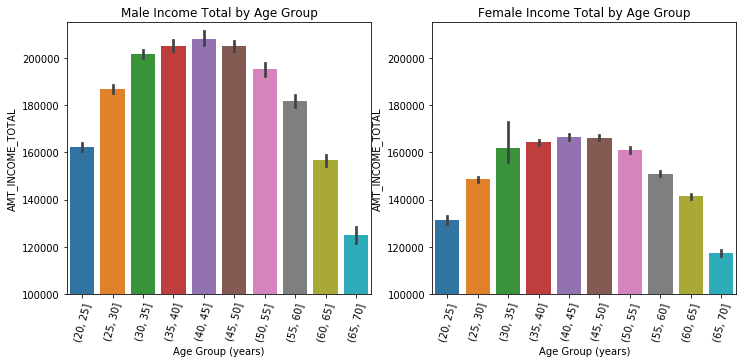

In [9]:
plt.figure(1, figsize = (12,5))

#男性年紀區間收入
ax1 = plt.subplot(1,2,1)
plt.sca(ax1)
# 以年齡區間為 x, target 為 y 繪製 barplot
px = app_train.loc[app_train['CODE_GENDER'] == 'M']['customized_age_grp']
py = app_train.loc[app_train['CODE_GENDER'] == 'M']['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('AMT_INCOME_TOTAL')
plt.ylim(100000,215000)
plt.title('Male Income Total by Age Group');

#女性年紀區間收入
ax2 = plt.subplot(1,2,2)
plt.sca(ax2)
# 以年齡區間為 x, target 為 y 繪製 barplot
px2 = app_train.loc[app_train['CODE_GENDER'] == 'F']['customized_age_grp']
py2 = app_train.loc[app_train['CODE_GENDER'] == 'F']['AMT_INCOME_TOTAL']
sns.barplot(px2, py2)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)');
plt.ylim(100000,215000)
plt.title('Female Income Total by Age Group');

# 比較男女各年齡區間收入
plt.show()